In [1]:
# lets underatand some of the most interesting patterns of funding and startups
# how does the funding ecosystem ranges with respect to time
# what is the general amount that startups get in india
# which kind of industries are more prefered for startup
# does location also play a role in determining the growth of startup
# who plays the main role in indian startup ecosystem
# what are the different type of funding for ecosystem

# importing libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('indiastartups.csv')
df

,Unnamed: 0,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
0,0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,202001
1,1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,202001
2,2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,202001
3,3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN,202001
4,4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,202001
...,...,...,...,...,...,...,...,...,...,...,...,...
3039,3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,NaN,201501
3040,3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,Govt backed VC Fund,201501
3041,3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,NaN,201501
3042,3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,-999.0,"Strategic Funding, Minority stake",201501


# EDA-Exploration Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3044 non-null   int64  
 1   SNo               3044 non-null   int64  
 2   Date              3044 non-null   object 
 3   StartupName       3044 non-null   object 
 4   IndustryVertical  2873 non-null   object 
 5   SubVertical       2108 non-null   object 
 6   City              2864 non-null   object 
 7   InvestorsName     3020 non-null   object 
 8   InvestmentType    3040 non-null   object 
 9   AmountInUSD       3044 non-null   float64
 10  Remarks           419 non-null    object 
 11  yearmonth         3044 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 285.5+ KB


In [5]:
df.shape

(3044, 12)

# Data Cleaning

In [6]:
df.drop(['Unnamed: 0','SNo','Remarks'], axis=1, inplace=True)

In [7]:
df

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,202001
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202001
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202001
...,...,...,...,...,...,...,...,...,...
3039,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,201501
3040,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,201501
3041,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,201501
3042,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,-999.0,201501


# Missing value

In [8]:
df.isnull().sum()

Date                  0
StartupName           0
IndustryVertical    171
SubVertical         936
City                180
InvestorsName        24
InvestmentType        4
AmountInUSD           0
yearmonth             0
dtype: int64

# percentage

In [9]:
round(df.isnull().sum()/len(df)*100,2)

Date                 0.00
StartupName          0.00
IndustryVertical     5.62
SubVertical         30.75
City                 5.91
InvestorsName        0.79
InvestmentType       0.13
AmountInUSD          0.00
yearmonth            0.00
dtype: float64

# Max amount invested

In [10]:
df['AmountInUSD'].max()

3900000000.0

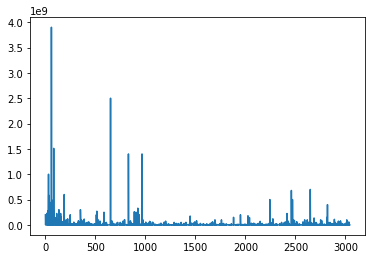

In [11]:
df['AmountInUSD'].plot(kind='line')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3044 non-null   object 
 1   StartupName       3044 non-null   object 
 2   IndustryVertical  2873 non-null   object 
 3   SubVertical       2108 non-null   object 
 4   City              2864 non-null   object 
 5   InvestorsName     3020 non-null   object 
 6   InvestmentType    3040 non-null   object 
 7   AmountInUSD       3044 non-null   float64
 8   yearmonth         3044 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 214.2+ KB


In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3044 non-null   datetime64[ns]
 1   StartupName       3044 non-null   object        
 2   IndustryVertical  2873 non-null   object        
 3   SubVertical       2108 non-null   object        
 4   City              2864 non-null   object        
 5   InvestorsName     3020 non-null   object        
 6   InvestmentType    3040 non-null   object        
 7   AmountInUSD       3044 non-null   float64       
 8   yearmonth         3044 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 214.2+ KB


In [15]:
df['year']=pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year
df['month']=pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month
df['yearmonth']=(df['year']*100)+df['month']

In [16]:
df

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth,year,month
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202009,2020,9
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001,2020,1
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,202009,2020,9
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202002,2020,2
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202002,2020,2
...,...,...,...,...,...,...,...,...,...,...,...
3039,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,201501,2015,1
3040,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,201501,2015,1
3041,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,201501,2015,1
3042,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,-999.0,201501,2015,1


In [17]:
df['yearmonth']=pd.to_datetime(df['Date']).dt.to_period('M')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3044 non-null   datetime64[ns]
 1   StartupName       3044 non-null   object        
 2   IndustryVertical  2873 non-null   object        
 3   SubVertical       2108 non-null   object        
 4   City              2864 non-null   object        
 5   InvestorsName     3020 non-null   object        
 6   InvestmentType    3040 non-null   object        
 7   AmountInUSD       3044 non-null   float64       
 8   yearmonth         3044 non-null   period[M]     
 9   year              3044 non-null   int64         
 10  month             3044 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6), period[M](1)
memory usage: 261.7+ KB


In [19]:
df.drop(['year','month'], axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3044 non-null   datetime64[ns]
 1   StartupName       3044 non-null   object        
 2   IndustryVertical  2873 non-null   object        
 3   SubVertical       2108 non-null   object        
 4   City              2864 non-null   object        
 5   InvestorsName     3020 non-null   object        
 6   InvestmentType    3040 non-null   object        
 7   AmountInUSD       3044 non-null   float64       
 8   yearmonth         3044 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), object(6), period[M](1)
memory usage: 214.2+ KB


# month with highest entry/registration

In [21]:
df['yearmonth'].value_counts().sort_values(ascending=False)

2016-04    102
2016-01    100
2015-09     98
2016-08     95
2015-07     94
          ... 
2020-01      2
2020-02      2
2020-09      2
2019-09      1
2020-10      1
Freq: M, Name: yearmonth, Length: 63, dtype: int64

In [22]:
year_month=df['yearmonth'].value_counts().sort_values(ascending=False)
year_month.index
year_month.values

array([102, 100,  98,  95,  94,  93,  89,  85,  83,  82,  82,  82,  81,
        81,  75,  72,  72,  70,  70,  70,  69,  67,  66,  66,  66,  65,
        58,  57,  55,  54,  54,  54,  54,  53,  52,  50,  38,  37,  33,
        32,  29,  29,  26,  23,  21,  18,  18,  18,  15,  14,  12,  11,
        11,   9,   7,   7,   7,   5,   2,   2,   2,   1,   1], dtype=int64)

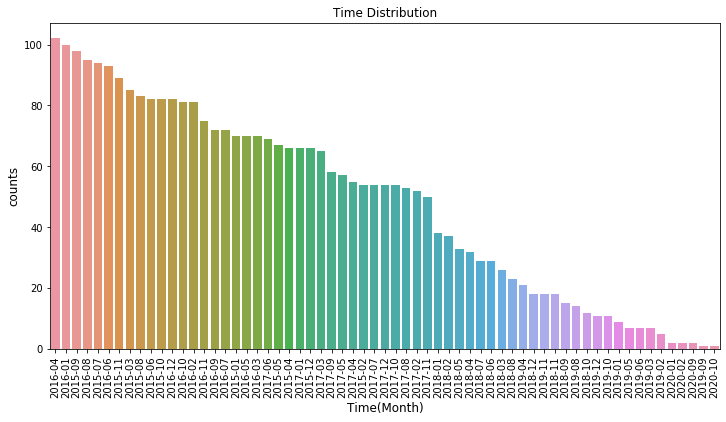

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=year_month.index,y=year_month.values)
plt.xticks(rotation=90)
plt.xlabel('Time(Month)',fontsize=12)
plt.ylabel('counts',fontsize=12)
plt.title('Time Distribution',fontsize=12)
plt.show()

In [24]:
# what is the general amount that startups get in india
Amount=df['AmountInUSD'].value_counts().sort_values(ascending=False).head(20)
Amount

-999.0         971
 1000000.0     166
 500000.0      108
 2000000.0      69
 5000000.0      67
 3000000.0      66
 10000000.0     61
 100000.0       57
 150000.0       45
 200000.0       44
 250000.0       41
 6000000.0      40
 15000000.0     39
 1500000.0      37
 4000000.0      35
 300000.0       32
 2500000.0      25
 600000.0       24
 50000000.0     24
 20000000.0     22
Name: AmountInUSD, dtype: int64

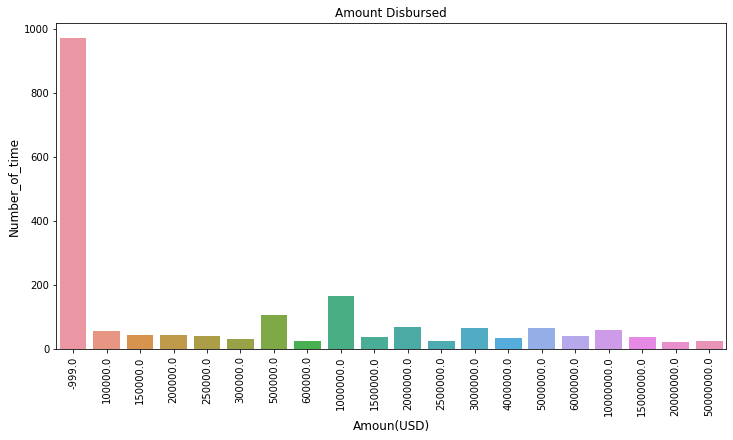

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=Amount.index,y=Amount.values)
plt.xticks(rotation=90)
plt.xlabel('Amoun(USD)',fontsize=12)
plt.ylabel('Number_of_time',fontsize=12)
plt.title('Amount Disbursed',fontsize=12)
plt.show()

In [26]:
#The amount of time each startup was funded
startup=df['StartupName'].value_counts().head(10)

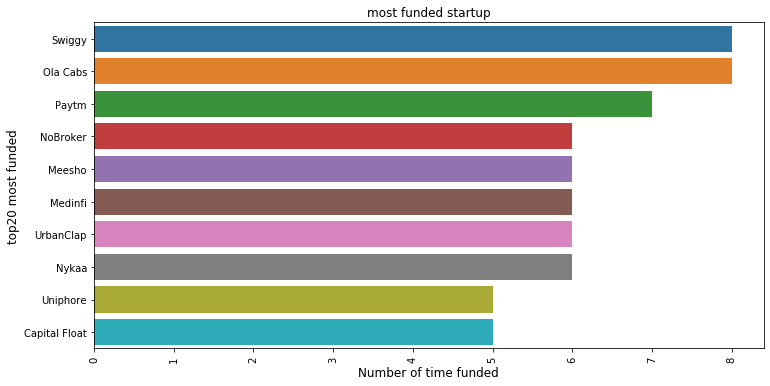

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(y=startup.index,x=startup.values)
plt.xticks(rotation=90)
plt.xlabel('Number of time funded',fontsize=12)
plt.ylabel('top20 most funded',fontsize=12)
plt.title('most funded startup',fontsize=12)
plt.show()

In [28]:
#which kind of industries are more prefered for startup
Industry=df['IndustryVertical'].value_counts().head(20)
Industry

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Ed-Tech               14
E-commerce            12
FinTech                9
IT                     8
Ecommerce              8
Fin-Tech               6
Real Estate            6
Food and Beverage      6
Others                 6
Logistics Tech         5
Name: IndustryVertical, dtype: int64

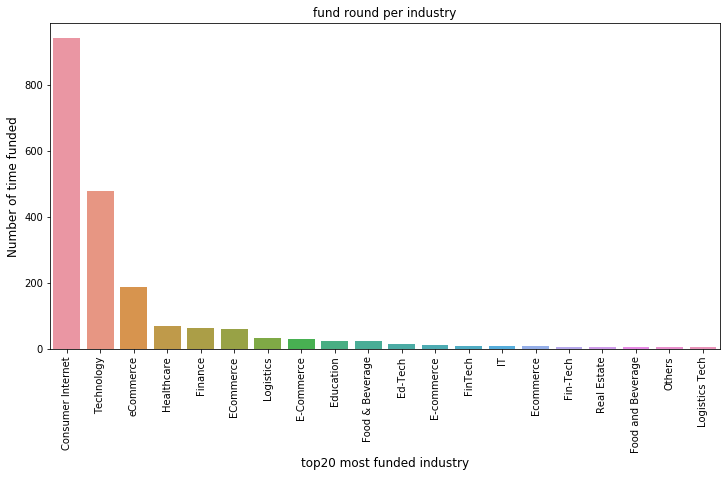

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x=Industry.index,y=Industry.values)
plt.xticks(rotation=90)
plt.ylabel('Number of time funded',fontsize=12)
plt.xlabel('top20 most funded industry',fontsize=12)
plt.title('fund round per industry',fontsize=12)
plt.show()

In [30]:
# does location also play a role in determining the growth of startup
Location=df['City'].value_counts().head(20)
Location

Bangalore     701
Mumbai        568
New Delhi     424
Gurgaon       291
Bengaluru     141
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Delhi          34
Jaipur         30
Kolkata        21
Indore         13
Chandigarh     11
Vadodara       10
Goa            10
Singapore       8
Coimbatore      5
Name: City, dtype: int64

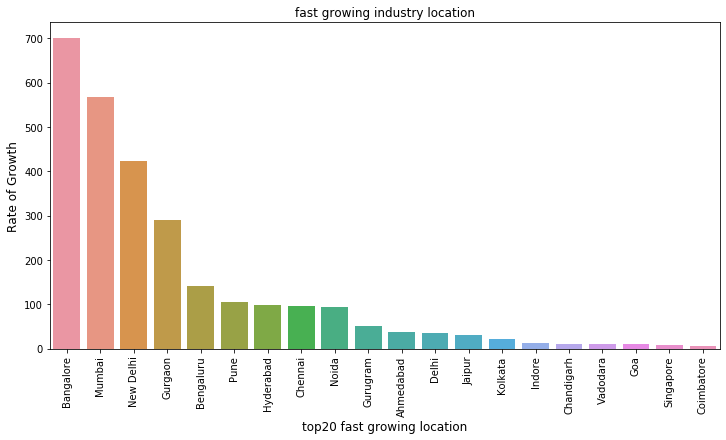

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x=Location.index,y=Location.values)
plt.xticks(rotation=90)
plt.ylabel('Rate of Growth',fontsize=12)
plt.xlabel('top20 fast growing location',fontsize=12)
plt.title('fast growing industry location',fontsize=12)
plt.show()

In [32]:
# who plays the main role in indian startup ecosystem
df['InvestorsName']=df['InvestorsName'].str.strip()
df

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020-09
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020-01
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020-09
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020-02
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020-02
...,...,...,...,...,...,...,...,...,...
3039,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,2015-01
3040,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,2015-01
3041,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,2015-01
3042,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,-999.0,2015-01


In [33]:
df['InvestorsName'].value_counts().head(30)

Undisclosed Investors        39
Undisclosed investors        30
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Undisclosed Investor         12
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
undisclosed investors        11
Undisclosed                  11
SAIF Partners                10
RoundGlass Partners          10
Nexus Venture Partners        9
Undisclosed investor          9
Tiger Global                  9
Info Edge (India) Ltd         9
Unitus Seed Fund              8
Blume Ventures                8
Trifecta Capital              8
Tiger Global Management       7
Matrix Partners               7
YouWeCan Ventures             7
The Chennai Angels            6
Bessemer Venture Partners     6
Y Combinator                  6
Paytm                         5
ah! Ventures                  5
Name: InvestorsName, dtype: int64

In [34]:
df[df['InvestorsName']=='Undisclosed Investors']

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
425,2018-01-30,MoneyOnMobile,Technology,Mobile Payment Platform,Mumbai,Undisclosed Investors,Private Equity,7600000.0,2018-01
432,2017-05-12,Mobycy,Technology,Bicycle sharing Platform,Gurgaon,Undisclosed Investors,Seed/Angel Funding,500000.0,2017-05
474,2017-03-11,Vagupu,Technology,Online Tutorial Marketplace,Bangalore,Undisclosed Investors,Seed Funding,1000000.0,2017-03
495,2017-11-15,Sumeru,Technology,Banking Software License Platform,Bangalore,Undisclosed Investors,Seed Funding,900000.0,2017-11
500,2017-11-17,Kanhaiya,Inspiration,Storytelling platform,Hyderabad,Undisclosed Investors,Seed/Angel Funding,200000.0,2017-11
610,2017-09-20,HWell24 Plus,Healthcare,Technology-Empowered Healthcare Solutions,Mumbai,Undisclosed Investors,Seed Funding,-999.0,2017-09
783,2017-06-30,Tagos Design,Technology,in-video discovery platform,Bangalore,Undisclosed Investors,Private Equity,5000000.0,2017-06
840,2017-05-24,GenNext Students,Consumer Internet,Online Tutoring Services,Mumbai,Undisclosed Investors,Seed Funding,580000.0,2017-05
845,2017-05-29,Wowflux,Technology,image Processing solution,New Delhi,Undisclosed Investors,Seed Funding,-999.0,2017-05
848,2017-05-30,SimpliLend,Consumer Internet,Online lending platform,New Delhi,Undisclosed Investors,Seed Funding,-999.0,2017-05


In [35]:
df['InvestorsName'][df['InvestorsName']=='Undisclosed Investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed Investor']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='undisclosed investors']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed']='Undisclosed Investors'
df['InvestorsName'][df['InvestorsName']=='Undisclosed Investor']='Undisclosed Investors'

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [36]:
df['InvestorsName'].value_counts().head(30)


Undisclosed Investors        103
Ratan Tata                    25
Indian Angel Network          24
Kalaari Capital               16
Group of Angel Investors      15
Sequoia Capital               15
Accel Partners                12
Venture Catalysts             11
Brand Capital                 11
SAIF Partners                 10
RoundGlass Partners           10
Nexus Venture Partners         9
Info Edge (India) Ltd          9
Undisclosed investor           9
Tiger Global                   9
Trifecta Capital               8
Unitus Seed Fund               8
Blume Ventures                 8
Tiger Global Management        7
Matrix Partners                7
YouWeCan Ventures              7
Bessemer Venture Partners      6
Y Combinator                   6
The Chennai Angels             6
Sixth Sense Ventures           5
InnoVen Capital                5
Axilor Ventures                5
Undisclosed HNIs               5
Exfinity Venture Partners      5
Paytm                          5
Name: Inve

In [37]:
investor=df['InvestorsName'].value_counts().head(30)

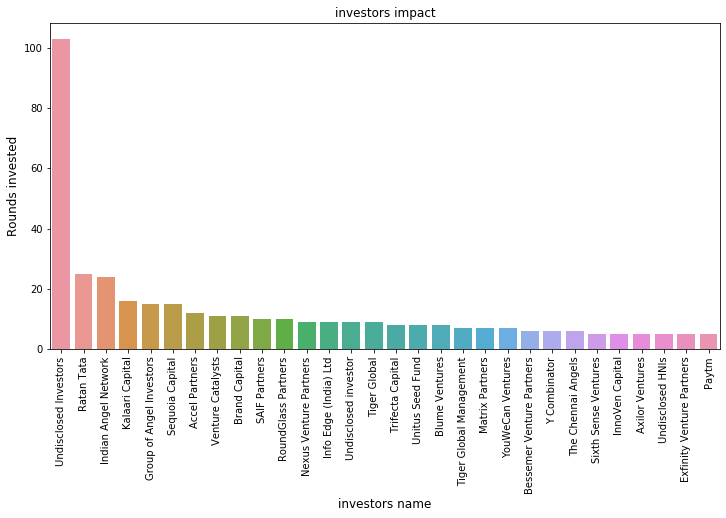

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x=investor.index,y=investor.values)
plt.xticks(rotation=90)
plt.ylabel('Rounds invested',fontsize=12)
plt.xlabel('investors name',fontsize=12)
plt.title('investors impact',fontsize=12)
plt.show()

In [39]:
# what are the different type of funding for ecosystem
df.head()
df['InvestmenntType']=df['InvestmentType'].str.strip()

In [40]:
df['InvestmentType'].value_counts()

Private Equity                 1356
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Private Equity Round              4
Seed                              4
Pre-Series A                      4
Seed / Angle Funding              3
Venture Round                     2
Equity                            2
Series F                          2
Corporate Round                   2
pre-Series A                      2
Series E                          2
Debt-Funding                      1
Single Venture                    1
Structured Debt                   1
Inhouse Funding                   1
Private Funding             

In [41]:
df['InvestmentType'][df['InvestmentType']=='Seed/ Angel Funding']='Seed Funding'
df['InvestmentType'][df['InvestmentType']=='Seed / Angel Funding']='Seed Funding'
df['InvestmentType'][df['InvestmentType']=='Seed\\nFunding']='Seed Funding'
df['InvestmentType'][df['InvestmentType']=='Seed/Angel Funding']='Seed Funding'
df['InvestmentType'][df['InvestmentType']=='Angel / Seed Funding']='Seed Funding'
df['InvestmentType'][df['InvestmentType']=='Seed funding']='Seed Funding'

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [42]:
df['InvestmentType'].value_counts()

Seed Funding                   1493
Private Equity                 1356
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
Seed Round                        7
Private Equity Round              4
Seed                              4
Pre-Series A                      4
Seed / Angle Funding              3
Series E                          2
Series F                          2
pre-Series A                      2
Corporate Round                   2
Venture Round                     2
Equity                            2
Inhouse Funding                   1
Single Venture                    1
Venture - Series Unknown          1
Crowd funding                     1
Crowd Funding                     1
Pre-series A                      1
Angel                             1
Pre Series A                      1
Series G                    

In [43]:
Investment=df['InvestmentType'].value_counts().head(10)
Investment

Seed Funding            1493
Private Equity          1356
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Series B                  20
Series C                  14
Series D                  12
Seed Round                 7
Private Equity Round       4
Name: InvestmentType, dtype: int64

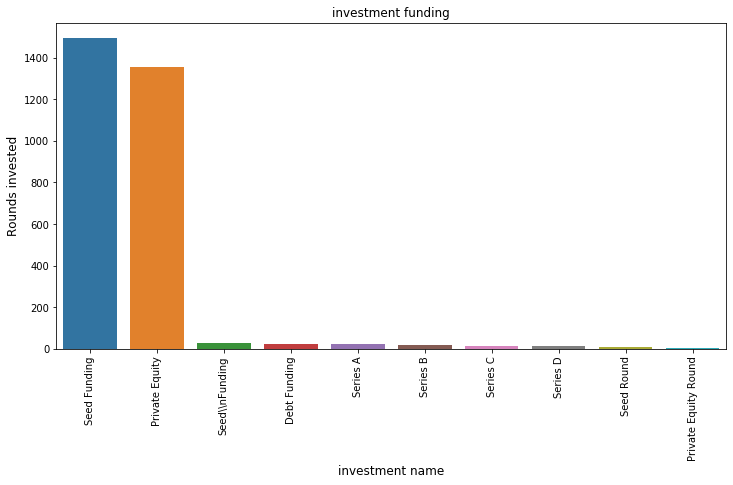

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x=Investment.index,y=Investment.values)
plt.xticks(rotation=90)
plt.ylabel('Rounds invested',fontsize=12)
plt.xlabel('investment name',fontsize=12)
plt.title('investment funding',fontsize=12)
plt.show()

In [45]:
# pip install wordcloud

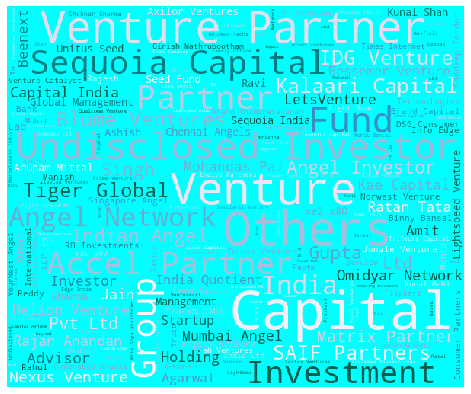

In [46]:
from wordcloud import WordCloud
name=df['InvestorsName'][~pd.isnull(df['InvestorsName'])]
wordcloud=WordCloud( max_font_size=70,width=600,height=500,colormap='PuBuGn',background_color='cyan').generate(' '.join (name))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordcloud)

In [47]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
pwd

'C:\\Users\\USER'